In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats 
import statsmodels.api as sm 

In [ ]:
education = pd.read_csv(r"C:\Users\Student\Desktop\Python\education_districtwise.csv")

In [ ]:
education= education.dropna()

In [ ]:
Ed_sample=education.sample(n=50, replace=True, random_state=31208)
Ed_sample

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


In [ ]:
estimate_1= Ed_sample.OVERALL_LI.mean()
estimate_1

74.22359999999999

In [ ]:
estimate_2= education.OVERALL_LI.sample(n=50, replace=True, random_state=56810).mean()
estimate_2

74.2478

In [ ]:
estimate_list=[]
for i in range (10000):
    estimate_list.append(education.OVERALL_LI.sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In [ ]:
mean_samples= estimate_df.mean()
mean_samples

estimate    73.39586
dtype: float64

In [ ]:
population_mean = education.OVERALL_LI.mean()
population_mean

73.39518927444796

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

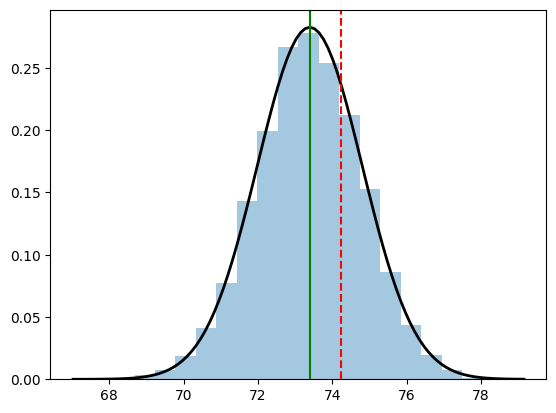

In [ ]:
plt.hist(estimate_df,bins=20, density=True, alpha=0.4, label="histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_samples, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate_1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_samples, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling Distribution of the sample mean")
plt.xlabel("sample mean")
plt.ylabel("Density")
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

explore sampling 

In [ ]:
data= pd.read_csv(r"C:\Users\Student\Desktop\Python\c4_epa_air_quality.csv", index_col=0)
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [ ]:
data.describe(include="all")

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [ ]:
data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


In [ ]:
sampled_data= data.sample(n=50,replace=True, random_state=42)
sampled_data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1


In [ ]:
sampled_mean= sampled_data.aqi.mean()
sampled_mean

5.54

In [ ]:
estimate_list2=[]
for i in range (10000):
    estimate_list2.append(sampled_data.aqi.sample(n=50,replace=True).mean())


In [ ]:
estimate_df2=pd.DataFrame(data={"estimate":estimate_list2})
estimate_df2

,estimate
0,6.20
1,5.48
2,5.50
3,4.20
4,5.44
...,...
9995,6.64
9996,4.66
9997,5.06
9998,5.12


In [ ]:
mean_samples2= estimate_df2.mean()
mean_samples2

estimate    5.539332
dtype: float64

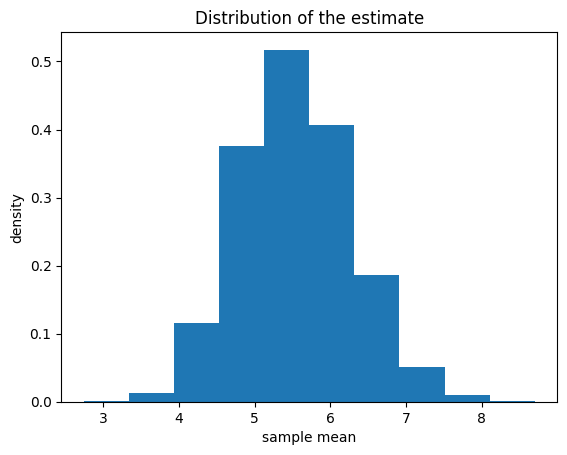

In [ ]:
plt.hist(estimate_df2["estimate"],density=True)
plt.title("Distribution of the estimate")
plt.xlabel("sample mean")
plt.ylabel("density")
plt.show()


In [ ]:
standard_error= sampled_data.aqi.std()/np.sqrt(len(sampled_data))
standard_error

0.7413225908290325

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

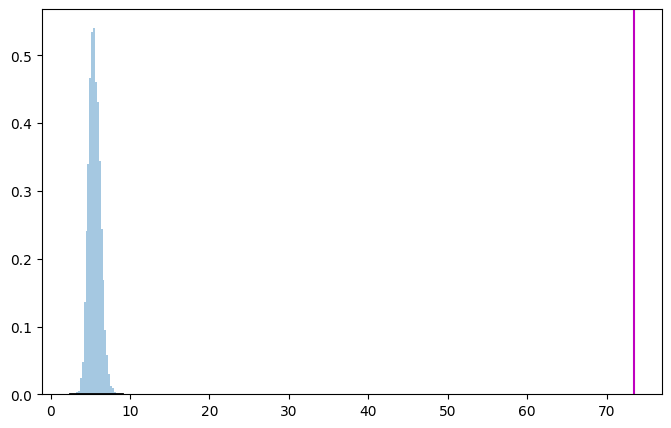

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df2, bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=mean_samples2, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_samples2, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));



confidence intervals 

In [ ]:
import numpy as np
import pandas as pd 
from scipy import stats

In [ ]:
education

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16


In [ ]:
sample= education.sample(n=50,replace=True,random_state=31208)
sample

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


In [ ]:
samples=sample.OVERALL_LI.mean()
samples

74.22359999999999

In [ ]:
estimated_std_err= sample.OVERALL_LI.std()/np.sqrt(samples)
estimated_std_err

1.1730278432184549

In [ ]:
stats.norm.interval(loc=samples,scale=estimated_std_err, confidence=0.95)

(71.92450767442912, 76.52269232557086)

In [ ]:
stats.norm.interval(confidence=0.99, loc=samples, scale=estimated_std_err )

(71.20208050755913, 77.24511949244085)

confidence interval

In [ ]:
air_data= pd.read_csv(r"C:\Users\Student\Desktop\Python\c4_epa_air_quality.csv")
air_data

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
...,...,...,...,...,...,...,...,...,...,...
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9


In [ ]:
air_data.isnull

<bound method DataFrame.isnull of      Unnamed: 0  date_local            state_name           county_name  \
0             0  2018-01-01               Arizona              Maricopa   
1             1  2018-01-01                  Ohio               Belmont   
2             2  2018-01-01               Wyoming                 Teton   
3             3  2018-01-01          Pennsylvania          Philadelphia   
4             4  2018-01-01                  Iowa                  Polk   
..          ...         ...                   ...                   ...   
255         255  2018-01-01  District Of Columbia  District of Columbia   
256         256  2018-01-01             Wisconsin                 Dodge   
257         257  2018-01-01              Kentucky             Jefferson   
258         258  2018-01-01              Nebraska               Douglas   
259         259  2018-01-01        North Carolina                  Wake   

         city_name                                    local_site_

In [ ]:
air_data.shape

(260, 10)

In [ ]:
air_data.describe(include="all")

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [ ]:
air_data.describe

<bound method NDFrame.describe of      Unnamed: 0  date_local            state_name           county_name  \
0             0  2018-01-01               Arizona              Maricopa   
1             1  2018-01-01                  Ohio               Belmont   
2             2  2018-01-01               Wyoming                 Teton   
3             3  2018-01-01          Pennsylvania          Philadelphia   
4             4  2018-01-01                  Iowa                  Polk   
..          ...         ...                   ...                   ...   
255         255  2018-01-01  District Of Columbia  District of Columbia   
256         256  2018-01-01             Wisconsin                 Dodge   
257         257  2018-01-01              Kentucky             Jefferson   
258         258  2018-01-01              Nebraska               Douglas   
259         259  2018-01-01        North Carolina                  Wake   

         city_name                                    local_site_

In [ ]:
air_data.shape

(260, 10)

In [ ]:
air_data['aqi'].describe()

count    260.000000
mean       6.757692
std        7.061707
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       50.000000
Name: aqi, dtype: float64

In [ ]:
air_data['state_name'].value_counts()

state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska         

In [ ]:
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

In [ ]:
rre_states_aqi=air_data[air_data['state_name'].isin(rre_states)]
rre_states_aqi

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
12,12,2018-01-01,Ohio,Hamilton,Cincinnati,Taft NCore,Carbon monoxide,Parts per million,0.252632,3
16,16,2018-01-01,California,San Bernardino,Ontario,Ontario Near Road (Etiwanda),Carbon monoxide,Parts per million,0.747368,11
...,...,...,...,...,...,...,...,...,...,...
247,247,2018-01-01,Texas,Dallas,Dallas,Dallas Hinton,Carbon monoxide,Parts per million,0.157895,2
248,248,2018-01-01,Michigan,Wayne,Detroit,NORTHWEST,Carbon monoxide,Parts per million,0.415789,8
249,249,2018-01-01,California,Orange,Anaheim,Anaheim Near-Road,Carbon monoxide,Parts per million,1.015789,15
250,250,2018-01-01,California,Los Angeles,West Los Angeles,West Los Angeles,Carbon monoxide,Parts per million,0.655556,11


In [ ]:
rre_states_aqi.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


In [ ]:
import seaborn as sns

<Axes: xlabel='state_name', ylabel='aqi'>

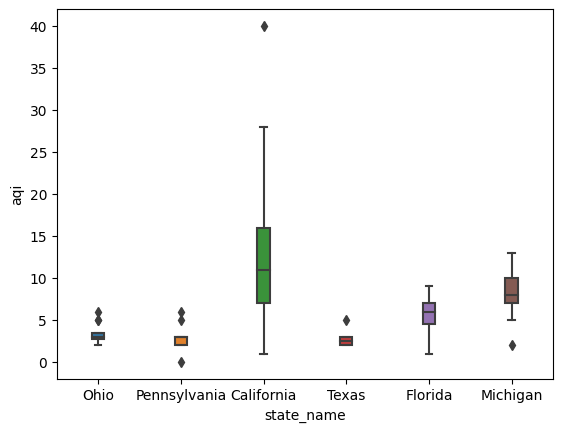

In [ ]:
sns.boxplot(x=rre_states_aqi['state_name'], y=rre_states_aqi['aqi'],width=0.15)

In [ ]:
aqi_cali=rre_states_aqi[rre_states_aqi["state_name"]=="California"]
sample_mean= aqi_cali["aqi"].mean()
sample_mean

12.121212121212121

In [ ]:
from scipy import stats

In [ ]:
confidence_level = 0.99
confidence_level
z_score =1.65

In [ ]:
#margin of error= z-score*standard error
standard_error= aqi_cali["aqi"].std()/np.sqrt(aqi_cali.shape[0])
standard_error

0.8987209641127412

In [ ]:
margin_err = standard_error * z_score
margin_err

1.482889590786023

In [ ]:
stats.norm.interval(confidence=0.99,scale = standard_error, loc= sample_mean)

(9.806260326136803, 14.43616391628744)